In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random # Ignore it 
import sys # ignore it
import cv2  # Computer Vision Library

#import matplotlib # graying of the images
#from PIL import image as pil
from subprocess import check_output # accuracy and quality

import matplotlib.pyplot as plt
from datetime import datetime

from skimage.morphology import disk
from skimage.filters.rank import gradient
#from skimage import data
#from skimage.color import rgb2gray #Grayscale
#!pip install opencv-python

#from imutils import paths
#import argparse
#!pip install imutils

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#from keras.models import Sequential # Easy-to-use DL Library
#from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
#from keras.optimizers import Adam # Labeling techniques used for medical data like images
#from sklearn.model_selection import train_test_split # bunch of ML libraries, train / test split of fundus images
#from keras.utils import to_categorical
#print(os.listdir("/content/drive/My Drive/Education/BlueBoxAI/Retina Images/a. Training Set"))
print(os.listdir("/content/drive/My Drive/Education/BlueBoxAI/DRD_work/Input/A. Segmentation/1. Original Images/a. Training Set"))


NUM_CLASSES = 5
# we need images of same size so we convert them into the size
WIDTH = 128
HEIGHT = 128
DEPTH = 3
inputShape = (HEIGHT, WIDTH, DEPTH)
# initialize number of epochs to train for, initial learning rate and batch size
EPOCHS = 15
INIT_LR = 1e-3
BS = 32
#global variables
ImageNameDataHash = {}
uniquePatientIDList = []


Using TensorFlow backend.


['IDRiD_35.jpg', 'IDRiD_43.jpg', 'IDRiD_49.jpg', 'IDRiD_42.jpg', 'IDRiD_50.jpg', 'IDRiD_54.jpg', 'IDRiD_48.jpg', 'IDRiD_53.jpg', 'IDRiD_41.jpg', 'IDRiD_44.jpg', 'IDRiD_36.jpg', 'IDRiD_47.jpg', 'IDRiD_52.jpg', 'IDRiD_51.jpg', 'IDRiD_37.jpg', 'IDRiD_27.jpg', 'IDRiD_45.jpg', 'IDRiD_40.jpg', 'IDRiD_39.jpg', 'IDRiD_46.jpg', 'IDRiD_38.jpg', 'IDRiD_34.jpg', 'IDRiD_23.jpg', 'IDRiD_16.jpg', 'IDRiD_21.jpg', 'IDRiD_14.jpg', 'IDRiD_31.jpg', 'IDRiD_26.jpg', 'IDRiD_28.jpg', 'IDRiD_10.jpg', 'IDRiD_22.jpg', 'IDRiD_32.jpg', 'IDRiD_15.jpg', 'IDRiD_24.jpg', 'IDRiD_11.jpg', 'IDRiD_12.jpg', 'IDRiD_33.jpg', 'IDRiD_17.jpg', 'IDRiD_09.jpg', 'IDRiD_25.jpg', 'IDRiD_30.jpg', 'IDRiD_19.jpg', 'IDRiD_13.jpg', 'IDRiD_20.jpg', 'IDRiD_29.jpg', 'IDRiD_18.jpg', 'IDRiD_05.jpg', 'IDRiD_08.jpg', 'IDRiD_06.jpg', 'IDRiD_07.jpg', 'IDRiD_02.jpg', 'IDRiD_01.jpg', 'IDRiD_04.jpg', 'IDRiD_03.jpg']


In [0]:
#define a function to get the images from the folders and change the size
def readTrainData(trainDir):
    global ImageNameDataHash
    # loop over the input images
    images = os.listdir(trainDir)
    print("Number of files in " + trainDir + " is " + str(len(images)))
    for imageFileName in images:
      #if (imageFileName == "IDRiD_50.jpg"):  
        #joining the trainDir with image name using / as a separator to get full path for the imagefile
        imageFullPath = os.path.join(os.path.sep, trainDir, imageFileName)
        
        # load the image, pre-process it, and store it in the data list
        img = cv2.imread(imageFullPath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        arr = img_to_array(img)  # Numpy array with shape (233,233,3)
        dim1 = arr.shape[0]
        dim2 = arr.shape[1]
        dim3 = arr.shape[2]
       
        if (dim1 < 128 or dim2 < WIDTH or dim3 < DEPTH):
            print("Error image dimensions are less than expected "+str(arr.shape))
        
        ratio = dim1 / dim2
        HEIGHT = int(WIDTH*ratio)
        
        #.....dont resize for now.....arr = cv2.resize(arr, (WIDTH, HEIGHT)) #Numpy array with shape (HEIGHT, WIDTH,3)
        #print(arr.shape) # 128,128,3
        dim1 = arr.shape[0]
        dim2 = arr.shape[1]
        dim3 = arr.shape[2]
        #if (dim1 != HEIGHT or dim2 != WIDTH or dim3 != DEPTH):
            #print("Error after resize, image dimensions are not equal to expected "+str(arr.shape))
        #print(type(arr))
        # scale the raw pixel intensities to the range [0, 1] - TBD TEST
        arr = np.array(arr, dtype="float") / 255.0
        #imageFileName = imageFileName.replace('.jpeg','')
        ImageNameDataHash[str(imageFileName)] = np.array(arr)
        print(str(dim1) + "," + str(dim2) + "," + str(dim3))
        
        plt.imshow(img)
        plt.show()
        
        #retina_gray = rgb2gray(arr)
        #plt.imshow(retina_gray) #Show grayscale image
        #plt.show()
        #import opencv
        
        #Reduce noise by blurring with a Gaussian filter ( kernel size = 3 )
        retinaGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY);
        plt.imshow(retinaGray)
        plt.show()
        
        binary = cv2.GaussianBlur(retinaGray,(5,5),0)
        
        selection_element = disk(5) # matrix of n pixels with a disk shape
        retina_sharpness = gradient(retinaGray, selection_element)
        sharpImg = np.array(retinaGray, dtype="float") / 255.0
        plt.imshow(sharpImg, cmap="viridis")
        plt.axis('off')
        plt.colorbar()
        plt.show()
      
        
        # compute the Laplacian of the image and then return the focus
        # measure, which is simply the variance of the Laplacian
        fm = cv2.Laplacian(retinaGray, cv2.CV_64F).var()
        text = "Good"

        # if the focus measure is less than the supplied threshold,
        # then the image should be considered "blurry"
        if fm < 25:
          text = "Bad"
        print(str(imageFileName) + ": " + text + " " + str(fm))
        
    return

Loading images at...2019-03-09 19:35:22.909203
Number of files in /content/drive/My Drive/Education/BlueBoxAI/DRD_work/Input/A. Segmentation/1. Original Images/a. Training Set is 54
(2848, 4288, 3)
2848,4288,3


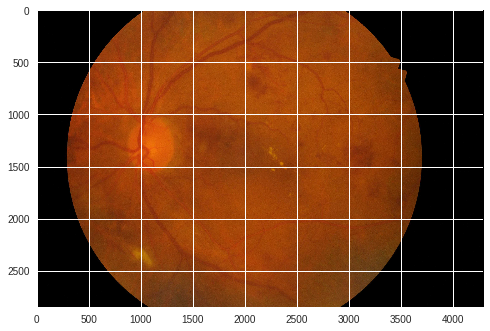

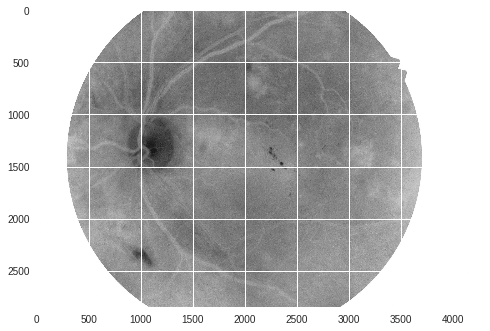

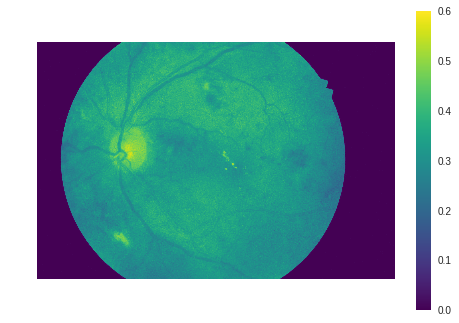

IDRiD_35.jpg: Good 29.50682905498242
(2848, 4288, 3)
2848,4288,3


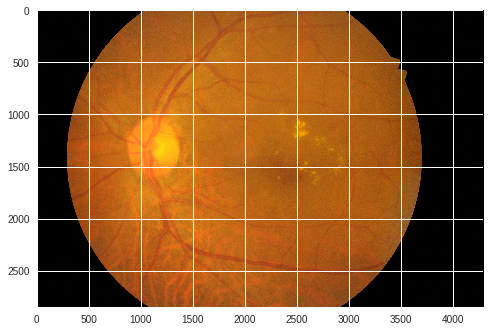

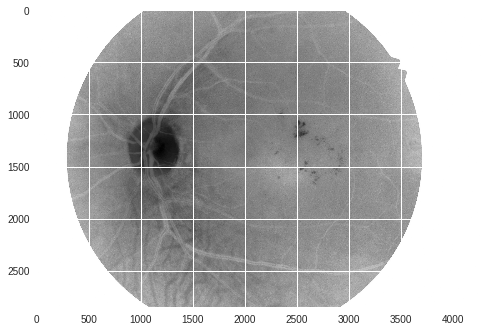

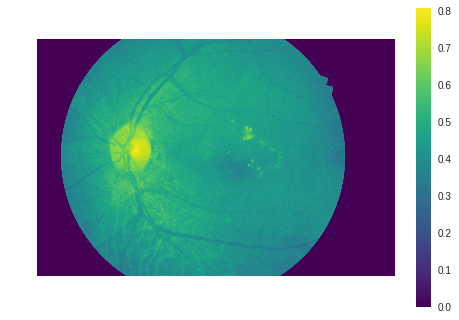

IDRiD_43.jpg: Good 25.490846785796982
(2848, 4288, 3)
2848,4288,3


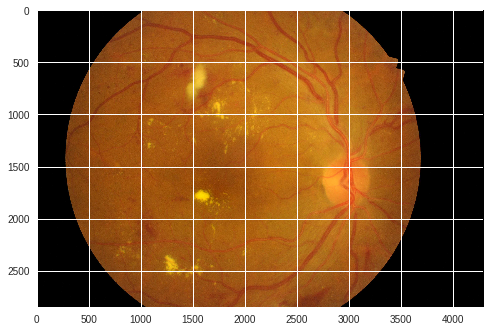

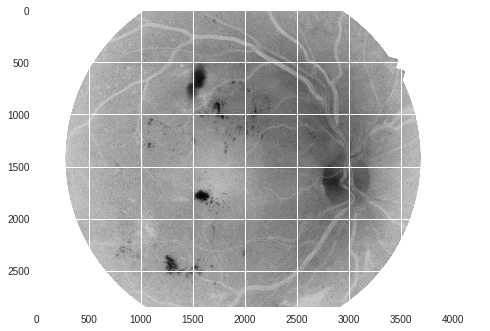

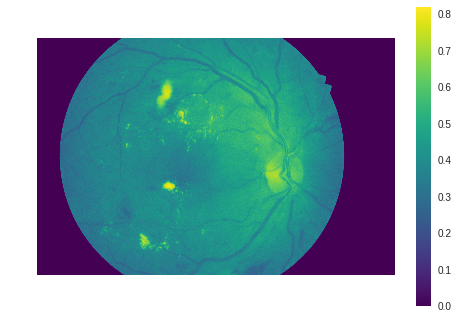

IDRiD_49.jpg: Good 28.079123097650324
(2848, 4288, 3)
2848,4288,3


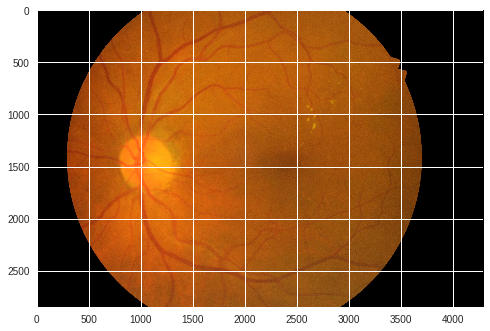

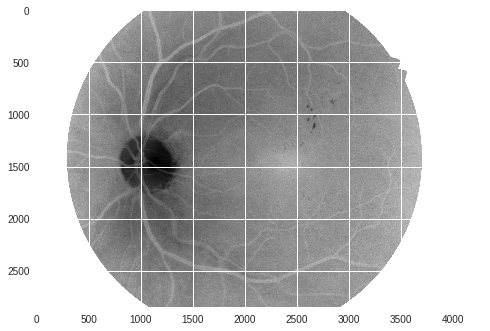

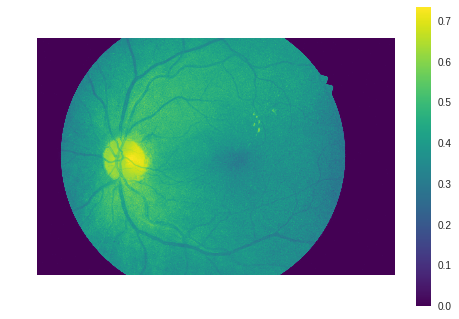

IDRiD_42.jpg: Good 27.413831338088364
(2848, 4288, 3)
2848,4288,3


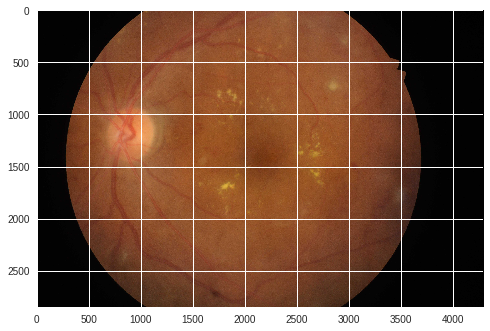

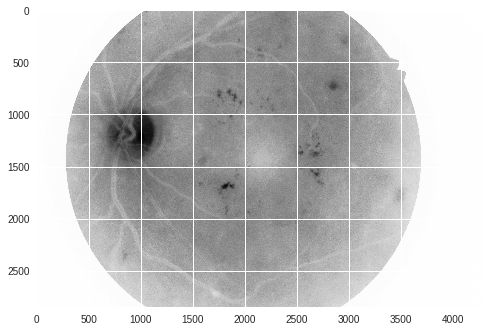

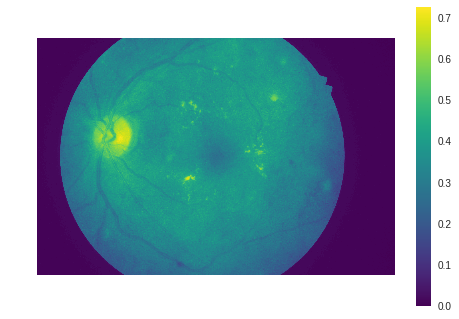

IDRiD_50.jpg: Good 33.44546144377152
(2848, 4288, 3)
2848,4288,3


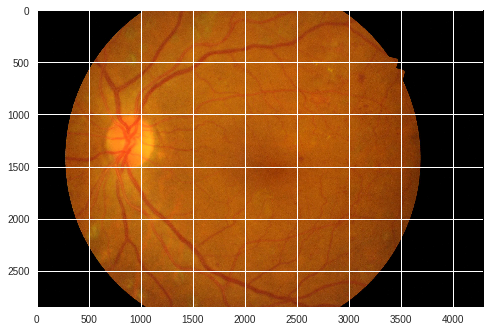

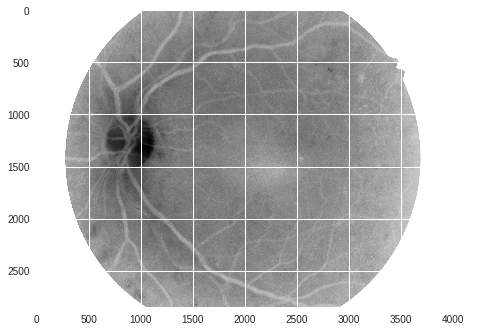

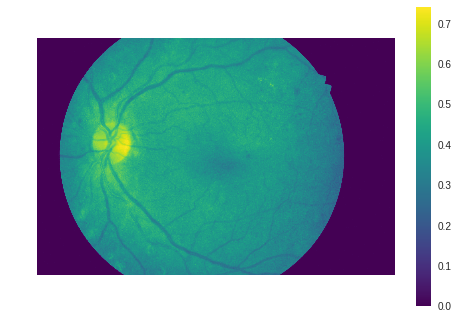

IDRiD_54.jpg: Good 25.684093249187356
(2848, 4288, 3)
2848,4288,3


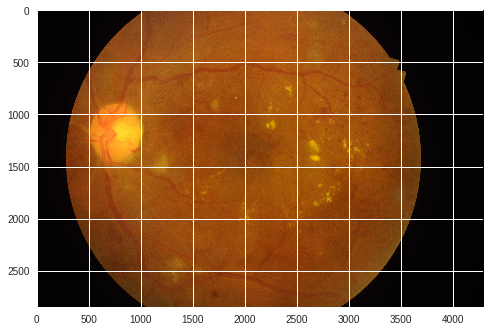

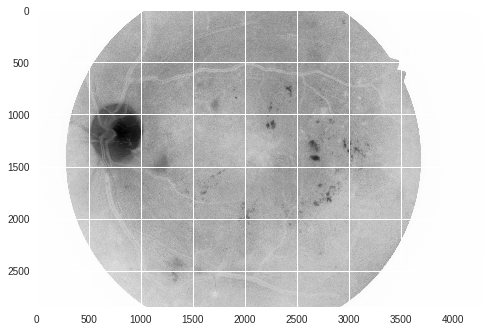

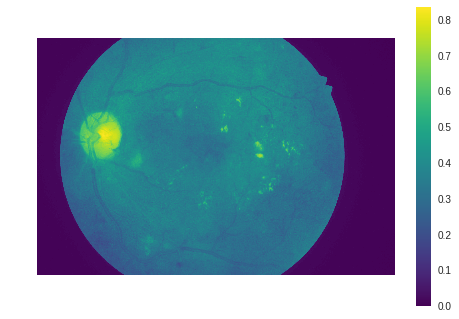

IDRiD_48.jpg: Good 30.54386383350163
(2848, 4288, 3)
2848,4288,3


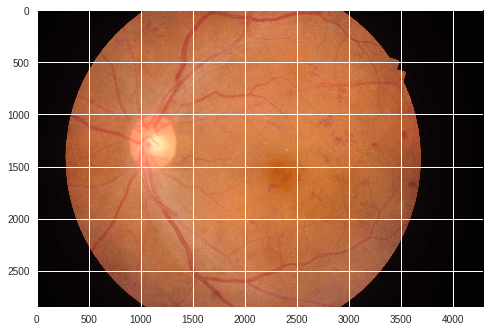

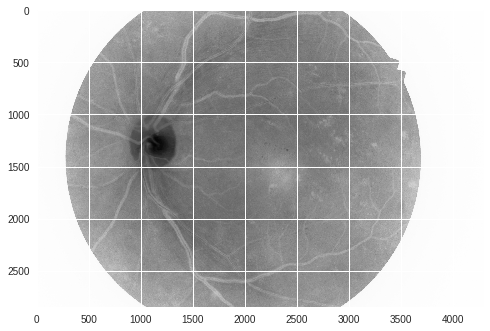

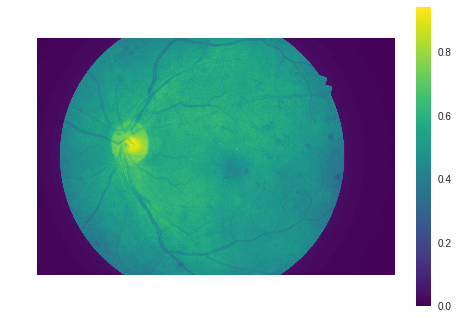

IDRiD_53.jpg: Bad 20.73532068755427
(2848, 4288, 3)
2848,4288,3


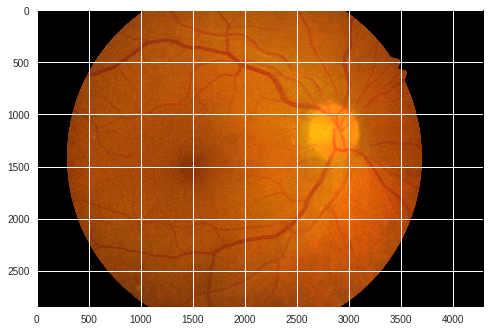

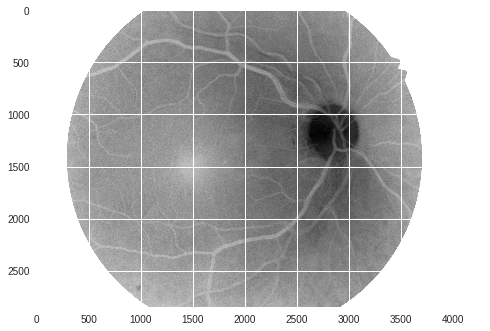

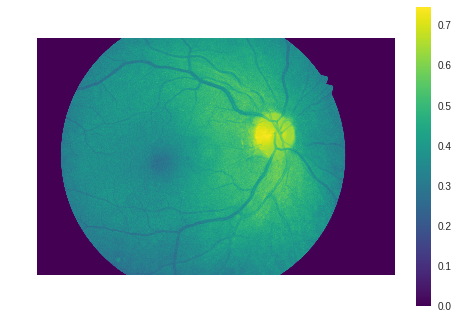

IDRiD_41.jpg: Good 26.036419242734247
(2848, 4288, 3)
2848,4288,3


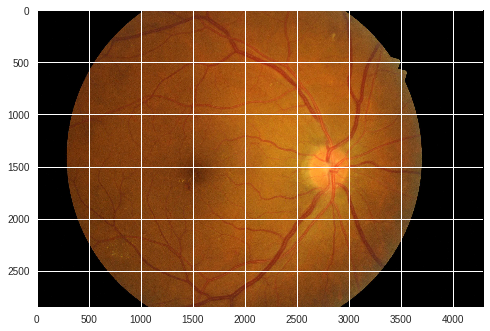

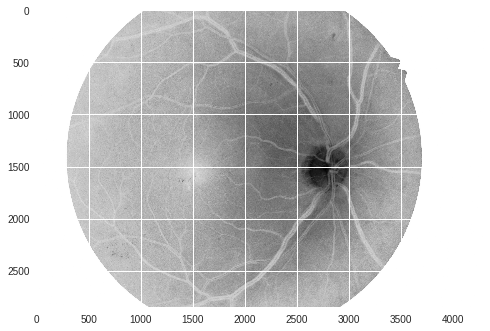

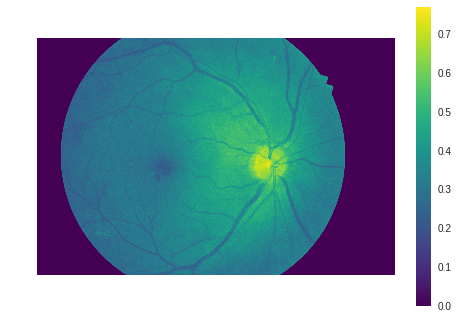

IDRiD_44.jpg: Good 31.24922233288863
(2848, 4288, 3)
2848,4288,3


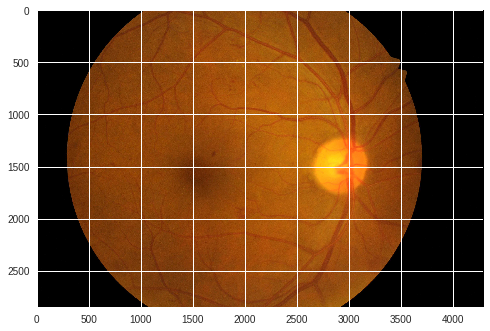

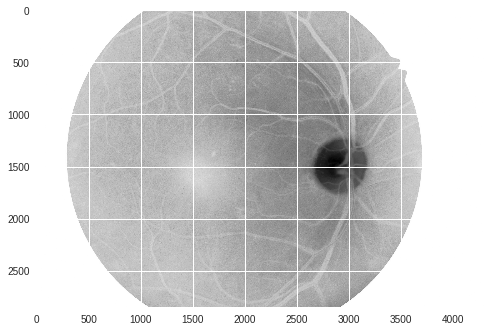

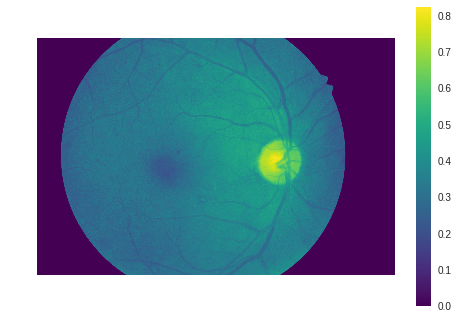

IDRiD_36.jpg: Good 29.72716001387639
(2848, 4288, 3)
2848,4288,3


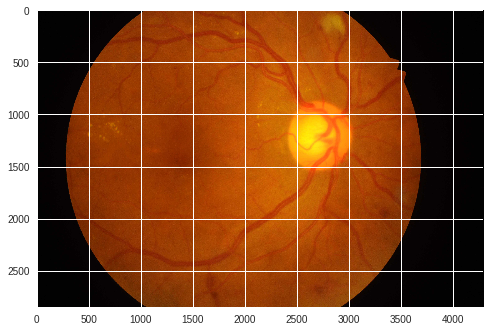

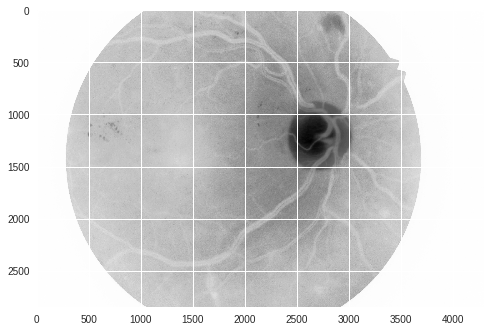

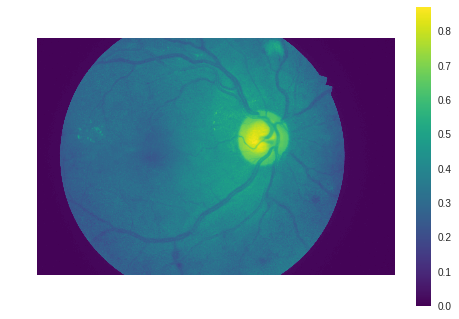

IDRiD_47.jpg: Bad 19.24004996595231
(2848, 4288, 3)
2848,4288,3


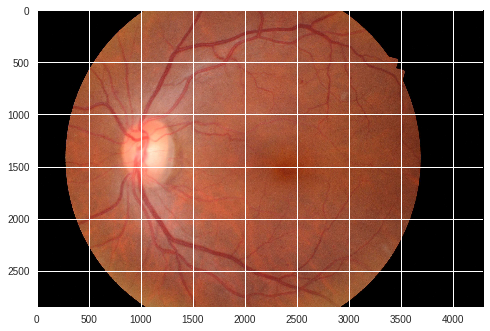

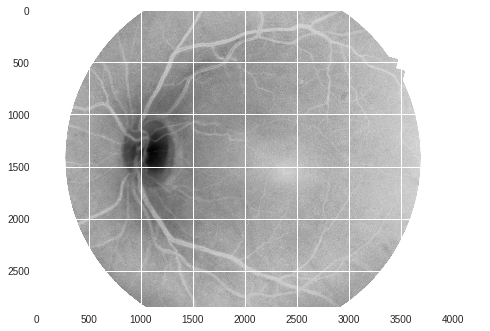

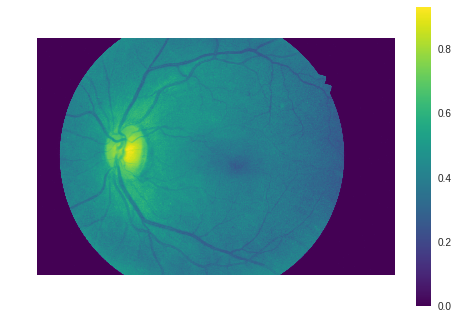

IDRiD_52.jpg: Good 29.717407654597388
(2848, 4288, 3)
2848,4288,3


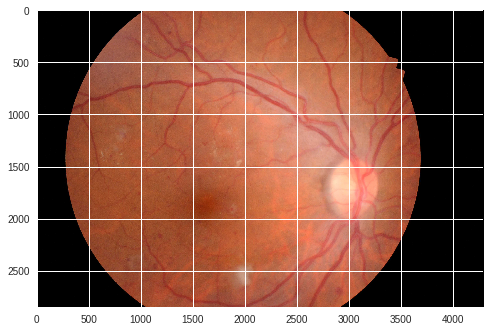

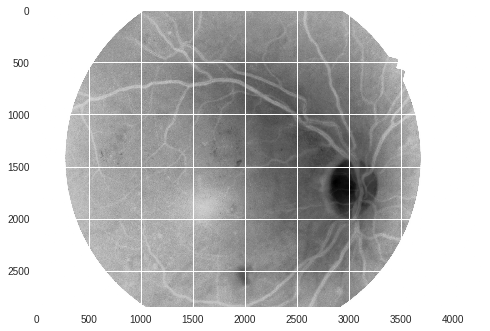

KeyboardInterrupt: ignored

In [4]:
print("Loading images at..."+ str(datetime.now()))
sys.stdout.flush()
#readTrainData("/kaggle/working/../input/")
# readTrainData("/content/drive/My Drive/Education/BlueBoxAI/Retina Images/a. Training Set")

#DISPLAY IMAGES
readTrainData("/content/drive/My Drive/Education/BlueBoxAI/DRD_work/Input/A. Segmentation/1. Original Images/a. Training Set")


print("Loaded " + str(len(ImageNameDataHash)) + " images at..."+ str(datetime.now())) # 1000